In [109]:
import pandas as pd
import numpy as np
import scipy as sp 
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import graphviz

In [110]:
# The Data from : https://www.kaggle.com/abcsds/pokemon 

# The data path of input file
data_path = "./Pokemon.csv"

# Read csv file to pandas dataframe
pd_data = pd.read_csv(data_path)

In [111]:
print('The data consists '+str(len(pd_data['Name']))+' Pokemons.')
pd_data.head()

The data consists 800 Pokemons.


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [112]:
# 資料整理
type1=pd_data['Type 1']
type2=pd_data['Type 2']
att = pd_data['Attack']
defe = pd_data['Defense']
spatt = pd_data['Sp. Atk']
spdefe = pd_data['Sp. Def']

pd_data = pd_data.drop(['#', 'Name', 'Generation', 'Legendary', 'Total', 'Type 1', 'Type 2','Attack', 'Defense', 'Sp. Atk', 'Sp. Def'], axis=1)
pd_data.head()

fast = []
att_minus_def = []
sp_att_minus_def = []
for i in range(0, len(type1)):
    if type1[i] == 'Flying' or type1[i] == 'Dragon' or type1[i] == 'Bug' or type2[i] == 'Flying' or type2[i] == 'Dragon' or type2[i] == 'Bug':
        fast.append(1)
    else:
        fast.append(0)
        
    att_minus_def.append( att[i] - defe[i] )
    sp_att_minus_def.append( spatt[i] - spdefe[i] )

pd_data['att_minus_def'] = att_minus_def
pd_data['sp_att_minus_def'] = sp_att_minus_def
pd_data['fast?'] = fast
pd_data.head()

,HP,Speed,att_minus_def,sp_att_minus_def,fast?
0,45,45,0,0,0
1,60,60,-1,0,0
2,80,80,-1,0,0
3,80,80,-23,2,0
4,39,65,9,10,0


In [113]:
# 建立 deciosion tree
y = pd_data["fast?"].values
x = pd_data.drop("fast?", axis=1)
x.head()

,HP,Speed,att_minus_def,sp_att_minus_def
0,45,45,0,0
1,60,60,-1,0
2,80,80,-1,0
3,80,80,-23,2
4,39,65,9,10


In [114]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)  #test_size預設是0.25

#設定tree的地方
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)  #criterion可換成entropy,預設是gini

clf = clf.fit(X_train, y_train)

y_result = clf.predict(X_test)
print('accuracy: ', accuracy_score(y_test, y_result))

accuracy:  0.7833333333333333


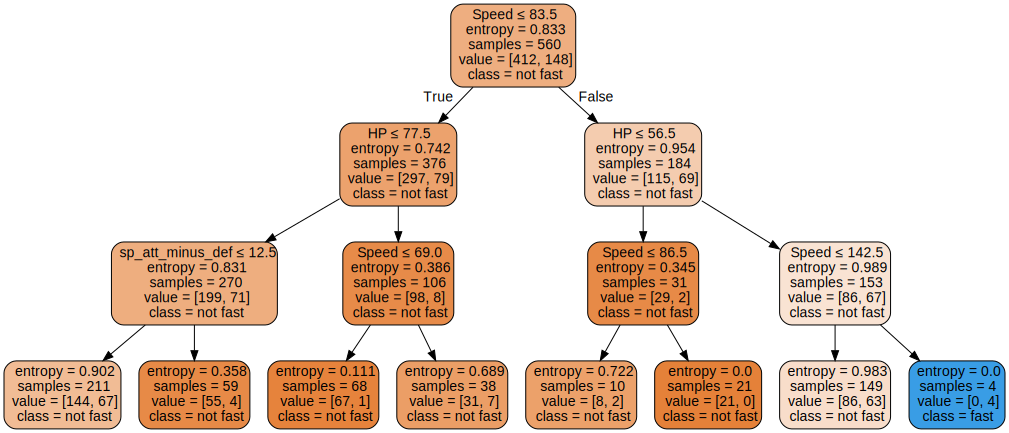

In [115]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=list(x),  
                     class_names=['not fast','fast'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 